# SAAF Notebook

This Jupyter Notebook provides an interactive platform for FaaS development. 

In [1]:
# Imports and setup for the notebook.
import os
import sys
sys.path.append(os.path.realpath('..'))
from platforms.jupyter.interactive_helpers import *

# Configure your function here details here.
config = {
    "lambdaRoleARN": "arn:aws:iam::616835888336:role/service-role/simple_microservice_role"
}

# Write Functions

Any function with the @cloud_function decorator will be uploaded to the cloud. Define platforms and memory settings in the decorator. Functions are tested locally and must run sucessfully before being deployed.

In [15]:
#
# A Hello World Function
#
@cloud_function(platforms=[Platform.AWS], memory=512, config=config)
def helloWorld(request, context):
    import json
    import logging
    from Inspector import Inspector
    import time
    
    # Import the module and collect data 
    inspector = Inspector()
    inspector.inspectAll()

    # Add custom message and finish the function
    if ('name' in request):
        inspector.addAttribute("message", "JOW! " + str(request['name']) + "!")
    else:
        inspector.addAttribute("message", "World!")
    
    inspector.inspectAllDeltas()
    return inspector.finish()

#
# A Hello World Function
#
@cloud_function(platforms=[Platform.AWS], memory=512, config=config)
def helloWorld_pow(request, context):
    import json
    import logging
    from Inspector import Inspector
    import time
    
    # Import the module and collect data 
    inspector = Inspector()
    inspector.inspectAll()

    # Add custom message and finish the function
    if ('name' in request):
        inspector.addAttribute("message", "CEOW! " + str(request['name']) + "!")
    else:
        inspector.addAttribute("message", "World!")
    
    inspector.inspectAllDeltas()
    return inspector.finish()

# Bulk test and deploy...
threads = []
functions = [helloWorld, helloWorld_pow]
for func in functions:
    thread = threading.Thread(target=test, args=(func, {"name": "Bob"}, config,))
    threads.append(thread)
    thread.start()
for thread in threads:
    thread.join()

Testing helloWorld on AWS Lambda...
{"version": 0.5, "lang": "python", "startTime": 1619848201558, "uuid": "5b71d45c-4666-4659-8b50-cbf6a6d4d89e", "newcontainer": 0, "vmuptime": 1619846576, "platform": "AWS Lambda", "containerID": "2021/05/01/[$LATEST]4307251f3add46cab4c37683912b0036", "functionName": "helloWorld", "functionMemory": "512", "functionRegion": "us-east-1", "vmID": "", "linuxVersion": "Linux 169.254.143.133 4.14.225-175.364.amzn2.x86_64 #1 SMP Mon Mar 22 22:06:01 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux", "totalMemory": 642644, "freeMemory": 522212, "pageFaults": 106815, "cpuType": "Intel(R) Xeon(R) Processor @ 2.50GHz", "cpuModel": "63", "cpuUsr": 55, "cpuNice": 0, "cpuKrn": 113, "cpuIdle": 324874, "cpuIowait": 6, "cpuIrq": 0, "cpuSoftIrq": 2, "vmcpusteal": 21, "contextSwitches": 26972, "frameworkRuntime": 89, "message": "JOW! Bob!", "userRuntime": 0, "cpuUsrDelta": 0, "cpuNiceDelta": 0, "cpuKrnDelta": 1, "cpuIdleDelta": 6, "cpuIowaitDelta": 0, "cpuIrqDelta": 0, "cpuSoftIr

In [16]:
#
# A Pi Calculator
#
@cloud_function(platforms=[Platform.AWS], memory=512, config=config, references=[helloWorld])
def calcPi(request, context):
    import json
    import logging
    from Inspector import Inspector
    import time
    
    # Import the module and collect data
    inspector = Inspector()
    inspector.inspectAll()
    
    # Calculate digits and return
    digits = int(request["digits"])
    
    # Pi Digits function from
    # https://www.geeksforgeeks.org/calculate-pi-with-python/ 
    k = 1
    s = 0
    for i in range(digits):
        if i % 2 == 0:
            s += 4 / k
        else:
            s -= 4 / k
        k += 2
    
    inspector.addAttribute("digits", s)
    
    request = {
        "name": "PI Function"
    }
    
    helloString = helloWorld(request, None)
    inspector.addAttribute("hello", helloString['message'])
    
    inspector.inspectAllDeltas()
    return inspector.finish()
    
test(function=calcPi, payload={"digits": 1000}, config=config)

Deploying calcPi to AWS Lambda...
Deployment to AWS Lambda Complete!
Testing calcPi on AWS Lambda...
{"version": 0.5, "lang": "python", "startTime": 1619848329196, "uuid": "75e7a95d-fcfd-4593-b380-966ec763f46d", "newcontainer": 0, "vmuptime": 1619846845, "platform": "AWS Lambda", "containerID": "2021/05/01/[$LATEST]429b296f4b3b455e9c82bafb22abfe1f", "functionName": "calcPi", "functionMemory": "512", "functionRegion": "us-east-1", "vmID": "", "linuxVersion": "Linux 169.254.109.213 4.14.225-175.364.amzn2.x86_64 #1 SMP Mon Mar 22 22:06:01 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux", "totalMemory": 642644, "freeMemory": 497904, "pageFaults": 100376, "cpuType": "Intel(R) Xeon(R) Processor @ 2.50GHz", "cpuModel": "63", "cpuUsr": 69, "cpuNice": 0, "cpuKrn": 110, "cpuIdle": 296487, "cpuIowait": 10, "cpuIrq": 0, "cpuSoftIrq": 4, "vmcpusteal": 49, "contextSwitches": 28180, "frameworkRuntime": 103, "digits": 3.140592653839794, "hello": "JOW! PI Function!", "userRuntime": 236, "cpuUsrDelta": 2, "cpuN

# Execute Experiments

Use FaaS Runner to execute complex FaaS Experiments.

In [17]:
experiment = {
	"callWithCLI": True,
  "callAsync": False,
  "memorySettings": [],
  "payloads": [{"digits": 1000000}],
  "runs": 200,
  "threads": 50,
  "iterations": 2,
  "sleepTime": 5,
  "randomSeed": 42,
  "outputGroups": [],
  "outputRawOfGroup": [],
  "showAsList": [],
  "showAsSum": ["newcontainer"],
  "ignoreFromAll": ["zAll", "version", "linuxVersion", "hostname"],
  "ignoreFromGroups": ["1_run_id", "2_thread_id", "cpuModel", "cpuIdle", "cpuIowait", "cpuIrq", "cpuKrn", "cpuNice", "cpuSoftIrq", "cpuUsr"],
  "ignoreByGroup": {
  "containerID": ["containerID"],
  "cpuType": ["cpuType"],
  "vmID": ["vmID"]
  },
  "invalidators": {},
  "removeDuplicateContainers": False,
  "overlapFilter": "functionName",
  "openCSV": False,
  "combineSheets": True,
  "warmupBuffer": 0
}

results = run_experiment(function=calcPi, platform=Platform.AWS, experiment=experiment, config=config)
results

  0%|          | 0/100 [00:00<?, ?it/s]

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,cpuIrq,...,runtime,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,3,2021/05/01/[$LATEST]fa4bb56e58b6484299e33f9ddb...,24458,131,126844,140,3,0,0,...,865,5.18,1619848487389,642644,776,edec3f82-dc9f-4a7d-8389-7ceb2bdca9b6,NaN,5,0,1619847851
1,0,4,2021/05/01/[$LATEST]127c08b4d0aa400981222e4386...,34366,156,458307,141,5,0,0,...,893,5.05,1619848487365,642644,765,07bd66f3-0a56-4187-b115-fe6b8b98197a,NaN,26,0,1619846194
2,0,0,2021/05/01/[$LATEST]728b9cdd7501411386ffa2b146...,31571,148,324950,136,6,0,0,...,875,7.29,1619848487628,642644,759,8d3263b1-2dc3-456e-9ea8-7d5eb06a97b1,ox-roo,31,1,1619846861
3,0,1,2021/05/01/[$LATEST]709f5b5955444b03be05ad70b0...,30476,192,324653,145,4,0,0,...,891,6.38,1619848487513,642644,784,6ede4ce5-c715-43c9-8f0f-d7b88291def7,NaN,23,0,1619846862
4,0,6,2021/05/01/[$LATEST]54411ff184674df4bfaea6e6ae...,30553,138,307233,141,9,0,0,...,874,7.83,1619848487688,642644,783,f4d0445c-d420-46a2-a365-f119c79e9bbf,ox-roo,26,0,1619846949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,44,2021/05/01/[$LATEST]e710e78191824855ae4ff6b0d6...,27878,152,138591,137,5,0,0,...,899,9.57,1619848497803,642644,757,70bca606-de0e-4757-a689-13c7f5481578,NaN,20,0,1619847802
196,3,39,2021/05/01/[$LATEST]728b9cdd7501411386ffa2b146...,35392,155,326784,138,6,0,0,...,872,9.21,1619848497853,642644,769,8d3263b1-2dc3-456e-9ea8-7d5eb06a97b1,ox-roo,36,1,1619846861
197,3,48,2021/05/01/[$LATEST]79f272641d604f3eb016c4aae3...,33189,165,369650,134,6,0,0,...,847,8.82,1619848497899,642644,748,18847086-73e1-49d0-983f-859f4dc62a2e,NaN,68,0,1619846647
198,3,27,2021/05/01/[$LATEST]fa4bb56e58b6484299e33f9ddb...,26686,137,128832,138,3,0,0,...,849,8.45,1619848497922,642644,769,edec3f82-dc9f-4a7d-8389-7ceb2bdca9b6,NaN,5,0,1619847851


# Process Results

FaaS Runner experiment results are parsed into a Pandas dataframe. This the flexibility to perform any kind of data processing that you would like.

(array([22., 61., 11.,  0.,  0.,  1.,  0.,  1.,  2.,  2.]),
 array([ 756. ,  789.5,  823. ,  856.5,  890. ,  923.5,  957. ,  990.5,
        1024. , 1057.5, 1091. ]),
 <BarContainer object of 10 artists>)

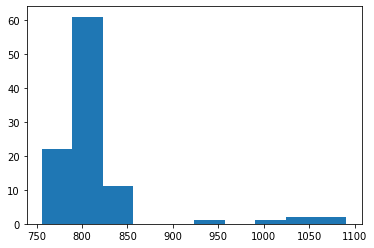

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Average Runtime
#np.average(results['userRuntime'])

# Histogram of Runtime
plt.hist(results['userRuntime'], 10)

# Scatter plot of CPU Profile
#plt.plot(results['cpuUsrDelta'], results['cpuIdleDelta'], 'o', color='black')

In [18]:
@cloud_function(platforms=[Platform.AWS], memory=512, config=config, references=[calcPi])
def calcPiDistributor(request, context):
    import json
    import logging
    from Inspector import Inspector
    import time
    import threading
    
    # Import the module and collect data
    inspector = Inspector()
    inspector.inspectAll()

    threads = []
    for x in range(request['runs']):
        threads.append(threading.Thread(target=calcPi, args=({"digits": 10000}, None,)))
    for thread in threads:
        thread.start()
    for thread in threads:
        thread.join()
    
    inspector.inspectAllDeltas()
    return inspector.finish()

test(function=calcPiDistributor, payload={"runs": 20}, config=config)

Deploying calcPiDistributor to AWS Lambda...
Deployment to AWS Lambda Complete!
Testing calcPiDistributor on AWS Lambda...
{"version": 0.5, "lang": "python", "startTime": 1619848740520, "uuid": "d9a5e894-9db2-4235-bb65-8b65d42caf4a", "newcontainer": 0, "vmuptime": 1619847234, "platform": "AWS Lambda", "containerID": "2021/05/01/[$LATEST]67434e93452a4a46810754b6574946d1", "functionName": "calcPiDistributor", "functionMemory": "512", "functionRegion": "us-east-1", "vmID": "", "linuxVersion": "Linux 169.254.183.109 4.14.225-175.364.amzn2.x86_64 #1 SMP Mon Mar 22 22:06:01 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux", "totalMemory": 642644, "freeMemory": 497304, "pageFaults": 100363, "cpuType": "Intel(R) Xeon(R) Processor @ 2.50GHz", "cpuModel": "63", "cpuUsr": 57, "cpuNice": 0, "cpuKrn": 93, "cpuIdle": 301060, "cpuIowait": 8, "cpuIrq": 0, "cpuSoftIrq": 1, "vmcpusteal": 25, "contextSwitches": 28470, "frameworkRuntime": 96, "userRuntime": 1197, "cpuUsrDelta": 5, "cpuNiceDelta": 0, "cpuKrnDelta":